In [10]:
import numpy as np 
import pandas as pd 
import cv2
import os

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,Input,Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import os

In [2]:
data = pd.read_csv("sign_mnist_test.csv")
print(data.shape)
data.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [3]:
real_x=data.iloc[:,1:785].values
real_y=data.iloc[:,0].values

In [4]:
training_x,testing_x,training_y,testing_y=train_test_split(real_x,real_y,test_size=0.20,random_state=0)
testing_x.shape, testing_y.shape


((1435, 784), (1435,))

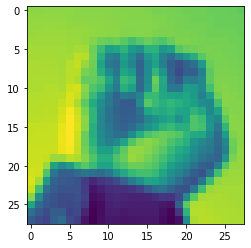

In [5]:
train_x=[]
for i in range(0,5737):
    tx=training_x[i].reshape((28,28))
    train_x.append(tx)
    b=training_y[i]
    path = 'C:/Users/shubh/Desktop/Pucho_research_intern/ASL_classification/train/'
    for j in range(0,25):
        if j==b:
            cv2.imwrite(os.path.join(path , str(b) + '/' +str(i)+'.jpg'), tx)
        else:
            j=j+1

plt.imshow(train_x[0])

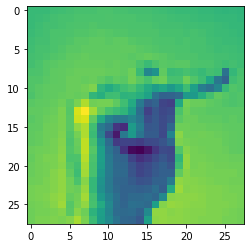

In [6]:
test_x=[]
for i in range(0,1435):
    tx1=testing_x[i].reshape((28,28))
    test_x.append(tx1)
    b=testing_y[i]
    path = 'C:/Users/shubh/Desktop/Pucho_research_intern/ASL_classification/test/'
    for j in range(0,25):
        if j==b:
            cv2.imwrite(os.path.join(path , str(b) + '/' +str(i)+'.jpg'), tx1)
        else:
            j=j+1


plt.imshow(test_x[2])



In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
batch_size=35
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory( 'C:/Users/shubh/Desktop/Pucho_research_intern/ASL_classification/train/',target_size=(28, 28),batch_size=32,class_mode='categorical')

test_set = test_datagen.flow_from_directory( 'C:/Users/shubh/Desktop/Pucho_research_intern/ASL_classification/test/',target_size=(28, 28),batch_size=32,class_mode='categorical')

h = model.fit_generator(
           training_set,
           steps_per_epoch=len(train_x) // batch_size,
           epochs=16,
           validation_data=test_set,
           validation_steps=len(test_x) // batch_size,
           callbacks=[learning_rate_reduction])

Found 5758 images belonging to 25 classes.
Found 1435 images belonging to 25 classes.
Epoch 1/16
163/163 [==============================] - 62s 379ms/step - loss: 2.0351 - acc: 0.3562 - val_loss: 1.1078 - val_acc: 0.6905
Epoch 2/16
163/163 [==============================] - 62s 377ms/step - loss: 1.5350 - acc: 0.4998 - val_loss: 0.7262 - val_acc: 0.8011
Epoch 3/16
163/163 [==============================] - 63s 384ms/step - loss: 1.1675 - acc: 0.6093 - val_loss: 0.3477 - val_acc: 0.9207
Epoch 4/16
163/163 [==============================] - 68s 416ms/step - loss: 0.9438 - acc: 0.6782 - val_loss: 0.2832 - val_acc: 0.9512
Epoch 5/16
163/163 [==============================] - 64s 394ms/step - loss: 0.7324 - acc: 0.7413 - val_loss: 0.1766 - val_acc: 0.9672
Epoch 6/16
163/163 [==============================] - 65s 400ms/step - loss: 0.6294 - acc: 0.7789 - val_loss: 0.0947 - val_acc: 0.9809
Epoch 7/16
163/163 [==============================] - 66s 407ms/step - loss: 0.5473 - acc: 0.8124 - val_

In [15]:
model.evaluate_generator(generator=test_set,
steps=len(test_x) // batch_size)

[0.015466247103177011, 0.9923780487804879]

In [43]:
test_set.reset()

In [44]:
pred=model.predict_generator(test_set,
steps=len(test_x) // 32,
verbose=1)

44/44 [==============================] - 4s 91ms/step


In [45]:
predicted_class_indices=np.argmax(pred,axis=1)

In [46]:
predicted_class_indices

array([ 1, 19,  7, ...,  7,  5, 12], dtype=int64)

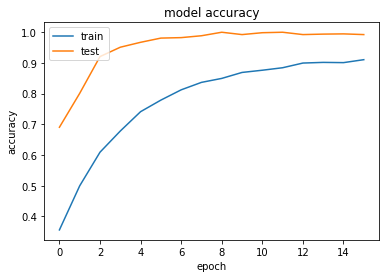

In [47]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

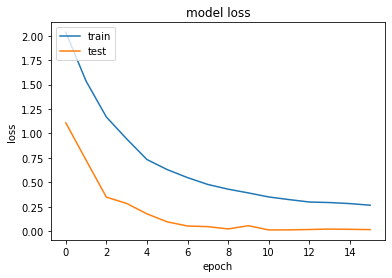

In [48]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()